In [8]:
import source.gprof_log_analysis.gprof_log as gl
import re

ptrn = re.compile(r'log_(.+).gplog$')
dt = gl.GprofDF('/home/luismendes/Desktop/VVCresearch/output_01/gprof_log/precise/AI/log_BasketballPass_qp22_AI_precise.gplog', 500)

In [7]:
logs = ['/home/luismendes/Desktop/VVCresearch/output_01/gprof_log/precise/AI/log_BasketballPass_qp22_AI_precise.gplog']

In [1]:
from pathlib import Path
dir_path = 'output_31012023'
logs = [str(f) for f in Path(dir_path).rglob('*.gplog')]
logs

['output_31012023/gprof_log/Precise/AI/log_BasketballPass_qp22_AI_Precise.gplog',
 'output_31012023/gprof_log/Precise/AI/log_BasketballPass_qp27_AI_Precise.gplog',
 'output_31012023/gprof_log/Precise/AI/log_BasketballPass_qp37_AI_Precise.gplog',
 'output_31012023/gprof_log/Precise/AI/log_BasketballPass_qp32_AI_Precise.gplog',
 'output_31012023/gprof_log/Precise/RA/log_BasketballPass_qp27_RA_Precise.gplog',
 'output_31012023/gprof_log/Precise/RA/log_BasketballPass_qp32_RA_Precise.gplog',
 'output_31012023/gprof_log/Precise/RA/log_BasketballPass_qp22_RA_Precise.gplog',
 'output_31012023/gprof_log/Precise/RA/log_BasketballPass_qp37_RA_Precise.gplog',
 'output_31012023/gprof_log/Precise/LB/log_BasketballPass_qp22_LB_Precise.gplog',
 'output_31012023/gprof_log/Precise/LB/log_BasketballPass_qp27_LB_Precise.gplog',
 'output_31012023/gprof_log/Precise/LB/log_BasketballPass_qp32_LB_Precise.gplog',
 'output_31012023/gprof_log/Precise/LB/log_BasketballPass_qp37_LB_Precise.gplog']

In [23]:

f_list = [
    'xCalcHADs2x2',
    'xCalcHADs4x4',
    'xCalcHADs8x8',
    'xCalcHADs16x8',
    'xCalcHADs8x16',
    'xCalcHADs4x8',
    'xCalcHADs8x4'
]

data = {'log_name': []}
for f in f_list:
    data[f] = []

for log in logs:
    log_data = gl.GprofDF(log, 10000, specific_class=('RdCost', ''))

    data['log_name'].append(log)
    for f in f_list:
        indexOf = log_data[log_data['name'] == f].index.values
        if len(indexOf) != 0:
            data[f].append(log_data['calls'][indexOf[0]])
        else:
            data[f].append(0.0)
import pandas as pd

index = pd.Series(data['log_name'])
index = index.apply(lambda n : re.findall(r'(qp\d{2}_\w{2})_.+\.gplog$', n)[0])

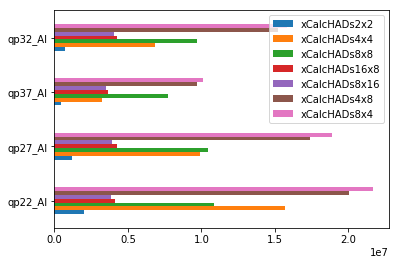

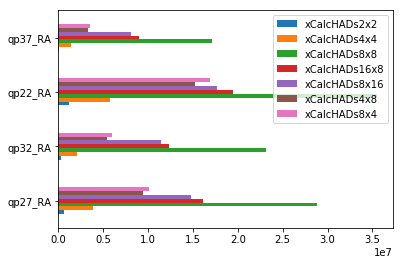

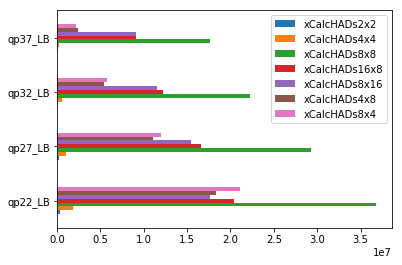

In [27]:

data = pd.DataFrame(data, index=index)
import matplotlib.pyplot as plt
data.iloc[:4].plot.barh()
data.iloc[4:8].plot.barh()
data.iloc[8:12].plot.barh()


In [ ]:

mean = data.loc[:,'xCalcHADs2x2':]
mean = mean.mean()
mean.plot.barh()


In [9]:
import matplotlib.pyplot as plt

dt = {'name': [], 'value': []}

for d in data.iloc[:,1:]:
    dt['name'].append(d)
    dt['value'].append(data[d].mean())
plt.barh(dt['name'], dt['value'])


<BarContainer object of 7 artists>